# Sub question 2b

*Which four countries are the global leaders in electric car and truck sales, and how have these sales developed from 2010 to 2022?*

*Cars:*
- Top four countries: China, USA, Germany and UK
- Year: 2022

*Trucks:*
- Top four countries: China, Germany, Brazil and Canada
- Year: 2022

In [1]:
# Import helpfull packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import car data

file_path = 'IEA-EV-dataEV salesHistoricalCars.csv'
df_cars = pd.read_csv(file_path)

df_cars_sales = df_cars[(df_cars['parameter'] == 'EV sales')]

df_cars_ev = df_cars_sales.drop(df_cars_sales[(df_cars_sales['powertrain'] == 'FCEV')       # Drop FCEV
                                | (df_cars_sales['region'] == 'World')                      # Drop World
                                | (df_cars_sales['region'] == 'EU27')                       # Drop EU27
                                | (df_cars_sales['region'] == 'Europe')                     # Drop Europe
                                | (df_cars_sales['region'] == 'Rest of the world')          # Drop Rest of the World
                                | (df_cars_sales['year'] >= 2023)].index)                   # Drop year 2023

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,2.800000e+07
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9.500000e+06
3795,World,Historical,EV stock,Cars,FCEV,2023,Vehicles,6.600000e+04
3796,World,Historical,EV sales,Cars,PHEV,2023,Vehicles,4.300000e+06


In [5]:
# Import truck data

file_path = 'IEA-EV-dataEV salesHistoricalTrucks.csv'
df_trucks = pd.read_csv(file_path)

df_trucks_sales = df_trucks[(df_trucks['parameter'] == 'EV sales')]                                 # Only use the EV-sales

df_trucks_ev = df_trucks_sales.drop(df_trucks_sales[(df_trucks_sales['powertrain'] == 'FCEV')       # Drop FCEV    
                                | (df_trucks_sales['region'] == 'World')                            # Drop World
                                | (df_trucks_sales['region'] == 'EU27')                             # Drop EU27
                                | (df_trucks_sales['region'] == 'Europe')                           # Drop Europe
                                | (df_trucks_sales['region'] == 'Rest of the world')                # Drop Rest of the World
                                | (df_trucks_sales['year'] >= 2023)].index)                         # Drop year 2023      

,region,category,parameter,mode,powertrain,year,unit,value
0,Belgium,Historical,EV stock,Trucks,BEV,2010.0,Vehicles,2.0000
1,Belgium,Historical,EV stock share,Trucks,EV,2010.0,percent,0.0013
2,Belgium,Historical,EV stock share,Trucks,EV,2011.0,percent,0.0040
3,Belgium,Historical,EV stock,Trucks,BEV,2011.0,Vehicles,6.0000
4,Belgium,Historical,EV sales share,Trucks,EV,2011.0,percent,0.0098
...,...,...,...,...,...,...,...,...
1023,World,Historical,EV stock,Trucks,FCEV,2023.0,Vehicles,11000.0000
1024,World,Historical,EV stock,Trucks,PHEV,2023.0,Vehicles,1300.0000
1025,World,Historical,EV sales,Trucks,BEV,2023.0,Vehicles,53000.0000
1026,World,Historical,EV stock,Trucks,BEV,2023.0,Vehicles,330000.0000


In [8]:
# Dataframe EVs cars China, USA, Germany and UK

df_cars_ev_china = df_cars_ev[df_cars_ev['region'] == 'China']                              # Selecting the right country
df_cars_ev_china_grouped = df_cars_ev_china.groupby('year')                                 # Group by year
df_cars_ev_china_total = df_cars_ev_china_grouped['value'].sum().reset_index()              # Reset index so the information can be used

df_cars_ev_USA = df_cars_ev[df_cars_ev['region'] == 'USA']                                  # Selecting the right country
df_cars_ev_USA_grouped = df_cars_ev_USA.groupby('year')                                     # Group by year
df_cars_ev_USA_total = df_cars_ev_USA_grouped['value'].sum().reset_index()                  # Reset index so the information can be used

df_cars_ev_germany = df_cars_ev[df_cars_ev['region'] == 'Germany']                          # Selecting the right country
df_cars_ev_germany_grouped = df_cars_ev_germany.groupby('year')                             # Group by year
df_cars_ev_germany_total = df_cars_ev_germany_grouped['value'].sum().reset_index()          # Reset index so the information can be used

df_cars_ev_UK = df_cars_ev[df_cars_ev['region'] == 'United Kingdom']                        # Selecting the right country
df_cars_ev_UK_grouped = df_cars_ev_UK.groupby('year')                                       # Group by year
df_cars_ev_UK_total = df_cars_ev_UK_grouped['value'].sum().reset_index()                    # Reset index so the information can be used

In [9]:
# Dataframe EVs trucks China, Germany, Brazil and Canada

df_trucks_ev_china = df_trucks_ev[df_trucks_ev['region'] == 'China']                        # Selecting the right country
df_trucks_ev_china_grouped = df_trucks_ev_china.groupby('year')                             # Group by year
df_trucks_ev_china_total = df_trucks_ev_china_grouped['value'].sum().reset_index()          # Reset index so the information can be used

df_trucks_ev_germany = df_trucks_ev[df_trucks_ev['region'] == 'Germany']                    # Selecting the right country
df_trucks_ev_germany_grouped = df_trucks_ev_germany.groupby('year')                         # Group by year
df_trucks_ev_germany_total = df_trucks_ev_germany_grouped['value'].sum().reset_index()      # Reset index so the information can be used

df_trucks_ev_brazil = df_trucks_ev[df_trucks_ev['region'] == 'Brazil']                      # Selecting the right country
df_trucks_ev_brazil_grouped = df_trucks_ev_brazil.groupby('year')                           # Group by year
df_trucks_ev_brazil_total = df_trucks_ev_brazil_grouped['value'].sum().reset_index()        # Reset index so the information can be used

df_trucks_ev_canada = df_trucks_ev[df_trucks_ev['region'] == 'Canada']
df_trucks_ev_canada_grouped = df_trucks_ev_canada.groupby('year')                           # Group by year
df_trucks_ev_canada_total = df_trucks_ev_canada_grouped['value'].sum().reset_index()        # Reset index so the information can be used

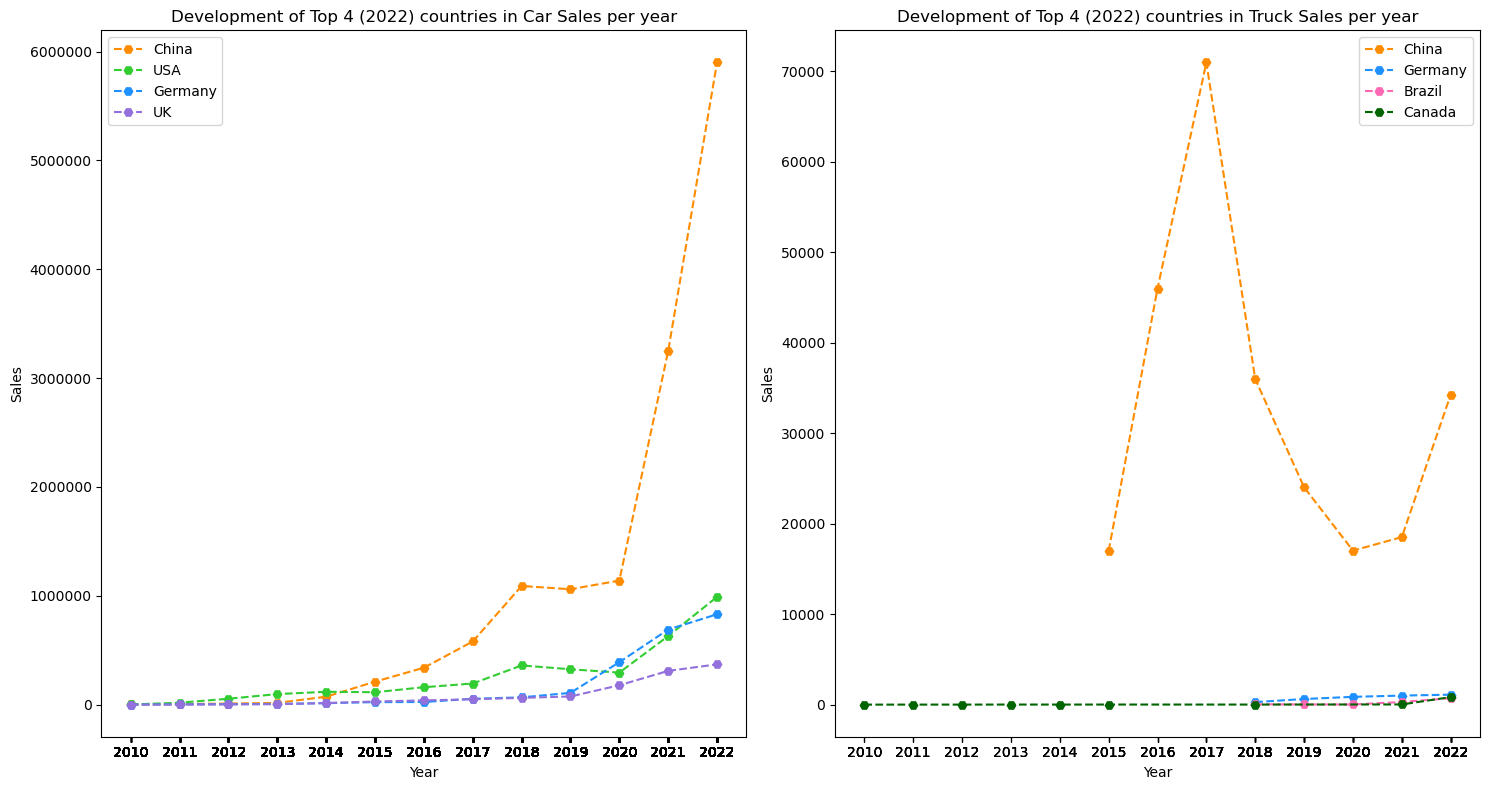

In [10]:
# Create figure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Cars: China, USA, Germany and United Kingdom
ax1.plot(df_cars_ev_china_total['year'], df_cars_ev_china_total['value'], label='China', marker='H', linestyle="--", color = 'darkorange')              	# Plotting China
ax1.plot(df_cars_ev_USA_total['year'], df_cars_ev_USA_total['value'], label='USA', marker='H', linestyle="--", color = 'limegreen')                         # Plotting USA
ax1.plot(df_cars_ev_germany_total['year'], df_cars_ev_germany_total['value'], label='Germany', marker='H', linestyle="--", color = 'dodgerblue')            # Plotting Germany
ax1.plot(df_cars_ev_UK_total['year'], df_cars_ev_UK_total['value'], label='UK', marker='H', linestyle="--", color = 'mediumpurple')                         # Plotting United Kingdom
ax1.set_title('Development of Top 4 (2022) countries in Car Sales per year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_xticks(df_cars_ev['year'])
ax1.legend()

# Trucks: China, Germany, Brazil and Canada
ax2.plot(df_trucks_ev_china_total['year'], df_trucks_ev_china_total['value'], label='China', marker='H', linestyle="--", color = 'darkorange')              # Plotting China
ax2.plot(df_trucks_ev_germany_total['year'], df_trucks_ev_germany_total['value'], label='Germany', marker='H', linestyle="--", color = 'dodgerblue')        # Plotting Germany
ax2.plot(df_trucks_ev_brazil_total['year'], df_trucks_ev_brazil_total['value'], label='Brazil', marker='H', linestyle="--", color = 'hotpink')              # Plotting Brazil
ax2.plot(df_trucks_ev_canada_total['year'], df_trucks_ev_canada_total['value'], label='Canada', marker='H', linestyle="--", color = 'darkgreen')            # Plotting Canada
ax2.set_title('Development of Top 4 (2022) countries in Truck Sales per year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales')
ax2.set_xticks(df_trucks_ev['year'])
ax2.legend() 

plt.suptitle('Development of top 4 (2022) countries in car/truck sales per year', fontsize=16)
plt.tight_layout()
plt.show()